In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()

('2017-08-23',)

Text(0, 0.5, 'Percipitation by Inches')

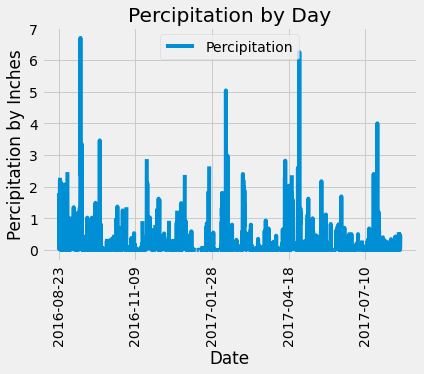

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent = dt.date(2017, 8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
dps = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= most_recent).all()
#dps
# Save the query results as a Pandas DataFrame and set the index to the date column
dps_df = pd.DataFrame(dps, columns=['Date', 'Percipitation'])
dps_df.set_index('Date', inplace= True)
dps_df

# Sort the dataframe by date
dps_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
dps_df.plot(rot=90)
plt.title('Percipitation by Day')
plt.ylabel('Percipitation by Inches')


In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dps_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

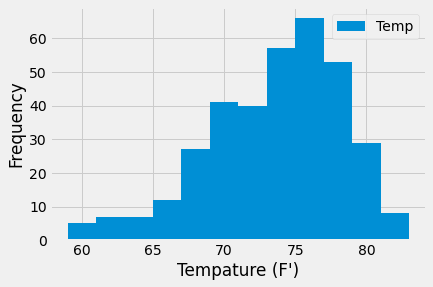

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
masid = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= most_recent).filter(Measurement.station == 'USC00519281')
masid_df = pd.DataFrame(masid, columns=['Date','Temp'])
masid_df.set_index('Date', inplace=True)
masid_df.sort_index(inplace=True)
masid_df.plot.hist(bins=12)
plt.xlabel("Tempature (F')")
plt.ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()